# Tarea 4. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 9.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


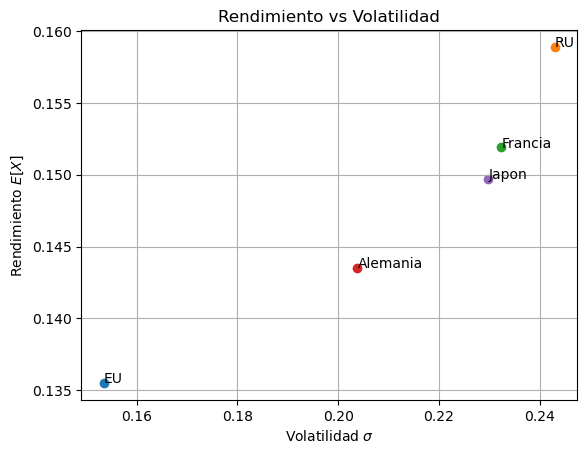

In [4]:
paises = annual_ret_summ.keys()
for i in paises:
    plt.scatter(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'])
    plt.text(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'], i)

plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [5]:
# Crear matriz diagonal con la info de las volatilidades individuales, tipo float
S = np.diag(annual_ret_summ.loc['Volatilidad']).astype(float)
S

array([[0.1535, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.243 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.2324, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.2038, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.2298]])

In [6]:
# A partir de la matriz anterior y la matriz de correlación:
sigma = S.dot(corr).dot(S)
sigma

array([[0.02356225, 0.01866144, 0.01568916, 0.01151538, 0.00939355],
       [0.01866144, 0.059049  , 0.03060847, 0.02112173, 0.01999681],
       [0.01568916, 0.03060847, 0.05400976, 0.02856943, 0.02095099],
       [0.01151538, 0.02112173, 0.02856943, 0.04153444, 0.01715502],
       [0.00939355, 0.01999681, 0.02095099, 0.01715502, 0.05280804]])

In [7]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)

# Rendimientos esperados individuales
# Activo1: EU, Activo2: Japon

# Rendimientos esperados individuales
e_jp = annual_ret_summ['Japon']['Media']
e_ru = annual_ret_summ['RU']['Media']

# Volatilidades individuales
vol_jp = annual_ret_summ['Japon']['Volatilidad']
vol_ru = annual_ret_summ['RU']['Volatilidad']

# Correlacion
corr_jp_ru = corr['Japon']['RU']

# Covarianza
covariance_jp_ru = corr_jp_ru * vol_jp * vol_ru

In [8]:
portafolios = pd.DataFrame({
    'w_jp': w,
    'w_ru': 1 -w,
    'media': w * e_jp + (1-w) * e_ru,
    'vol': np.sqrt(w**2 * vol_jp**2 + (1-w)**2 * vol_ru**2 + 2*w*(1-w)*covariance_jp_ru)

})
portafolios

,w_jp,w_ru,media,vol
0,0.00,1.00,0.158900,0.243000
1,0.01,0.99,0.158808,0.241402
2,0.02,0.98,0.158716,0.239824
3,0.03,0.97,0.158624,0.238266
4,0.04,0.96,0.158532,0.236727
...,...,...,...,...
96,0.96,0.04,0.150068,0.224272
97,0.97,0.03,0.149976,0.225619
98,0.98,0.02,0.149884,0.226990
99,0.99,0.01,0.149792,0.228383


In [9]:
portafolio_varianza_minima = portafolios[portafolios.vol == portafolios.vol.min()]

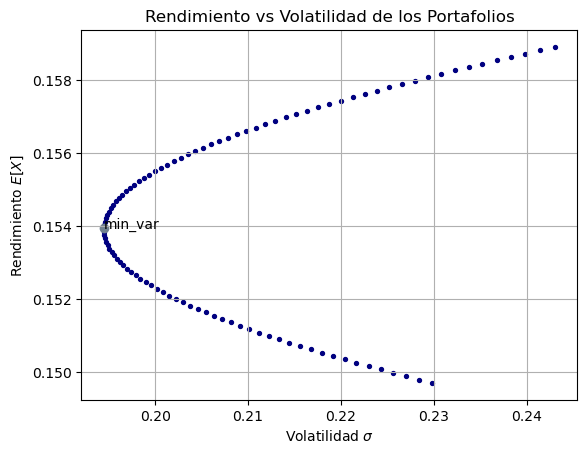

In [10]:
plt.scatter(portafolios.vol, portafolios.media, s=8, c='navy')
plt.scatter(portafolio_varianza_minima.vol, portafolio_varianza_minima.media, c='slategray')
plt.text(portafolio_varianza_minima.vol, portafolio_varianza_minima.media, 'min_var')

plt.title('Rendimiento vs Volatilidad de los Portafolios')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

In [11]:
w_min_var_jp = (vol_ru**2 - covariance_jp_ru) / (vol_ru**2 + vol_jp**2 - 2 * covariance_jp_ru)
w_min_var_ru = 1 - w_min_var_jp
w_min_var_jp, w_min_var_ru

(0.5434223641917344, 0.4565776358082656)

In [12]:
from scipy.optimize import minimize
# Función objetivo
def var2(w, s1, s2, s12):
    return w**2 * s1**2 + (1 - w)**2 * s2**2 + 2 * w * (1 - w) * s12

# Solución
minvar_num = minimize(
    fun=var2,
    x0=0.1,
    args=(vol_jp, vol_ru, covariance_jp_ru),
    bounds=((0,1),)
)

In [13]:
w_min_var = minvar_num['x']
w_min_var

array([0.5434223])

In [14]:
w_min_var * e_jp + (1-w_min_var) * e_ru

array([0.15390051])

In [15]:
np.sqrt(w_min_var**2 * vol_jp**2 + (1-w_min_var)**2 * vol_ru**2 + 2*w_min_var*(1-w_min_var) * covariance_jp_ru)

array([0.19449207])

**Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?**

Los pesos del portafolio de mínima varianza son:
* Japón: 54.35%
* RU: 45.65%

Rendimiento de portafolio de mínima varianza: 
15.39%

Volatilidad de portafolio de mínima varianza: 
19.44%

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [16]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)

# Rendimientos esperados individuales
# Activo1: EU, Activo2: Japon

# Rendimientos esperados individuales
e_jp = annual_ret_summ['Japon']['Media']
e_ru = annual_ret_summ['RU']['Media']

# Volatilidades individuales
vol_jp = annual_ret_summ['Japon']['Volatilidad']
vol_ru = annual_ret_summ['RU']['Volatilidad']

# Correlacion
corr_jp_ru2 = 0.5

# Covarianza
covariance_jp_ru2 = corr_jp_ru2 * vol_jp * vol_ru

In [17]:
portafolios2 = pd.DataFrame({
    'w_jp': w,
    'w_ru': 1 -w,
    'media': w * e_jp + (1-w) * e_ru,
    'vol': np.sqrt(w**2 * vol_jp**2 + (1-w)**2 * vol_ru**2 + 2*w*(1-w)*covariance_jp_ru2)

})
portafolios2

,w_jp,w_ru,media,vol
0,0.00,1.00,0.158900,0.243000
1,0.01,0.99,0.158808,0.241727
2,0.02,0.98,0.158716,0.240471
3,0.03,0.97,0.158624,0.239232
4,0.04,0.96,0.158532,0.238009
...,...,...,...,...
96,0.96,0.04,0.150068,0.225625
97,0.97,0.03,0.149976,0.226639
98,0.98,0.02,0.149884,0.227673
99,0.99,0.01,0.149792,0.228727


In [18]:
portafolio_varianza_minima2 = portafolios2[portafolios2.vol == portafolios2.vol.min()]

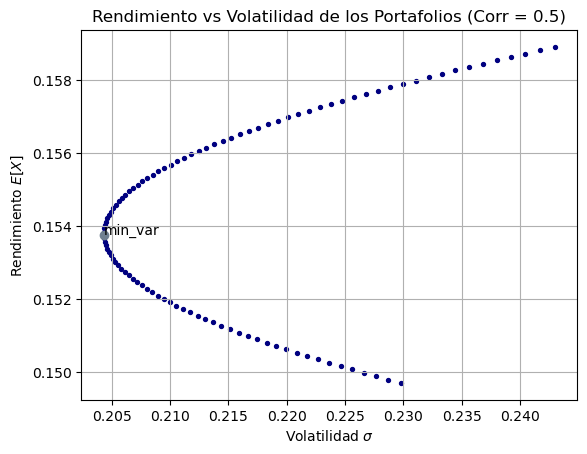

In [19]:
plt.scatter(portafolios2.vol, portafolios2.media, s=8, c='navy')
plt.scatter(portafolio_varianza_minima2.vol, portafolio_varianza_minima2.media, c='slategray')
plt.text(portafolio_varianza_minima2.vol, portafolio_varianza_minima2.media, 'min_var')

plt.title('Rendimiento vs Volatilidad de los Portafolios (Corr = 0.5)')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

In [20]:
w_min_var_jp2 = (vol_ru**2 - covariance_jp_ru2) / (vol_ru**2 + vol_jp**2 - 2 * covariance_jp_ru2)
w_min_var_ru2 = 1 - w_min_var_jp2
w_min_var_jp2, w_min_var_ru2

(0.5557072988900957, 0.44429270110990426)

In [21]:
from scipy.optimize import minimize
# Función objetivo
def var2(w, s1, s2, s12):
    return w**2 * s1**2 + (1 - w)**2 * s2**2 + 2 * w * (1 - w) * s12

# Solución
minvar_num2 = minimize(
    fun=var2,
    x0=0.1,
    args=(vol_jp, vol_ru, covariance_jp_ru2),
    bounds=((0,1),)
)

In [22]:
w_min_var2 = minvar_num2['x']
w_min_var2

array([0.55570714])

In [23]:
w_min_var2 * e_jp + (1-w_min_var2) * e_ru

array([0.15378749])

In [24]:
np.sqrt(w_min_var2**2 * vol_jp**2 + (1-w_min_var2)**2 * vol_ru**2 + 2*w_min_var2*(1-w_min_var2) * covariance_jp_ru2)

array([0.20433007])

**Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?**

Los pesos del portafolio de mínima varianza son:
* Japón: 55.57%
* RU: 44.43%

Rendimiento de portafolio de mínima varianza: 
15.37%

Volatilidad de portafolio de mínima varianza: 
20.43%

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

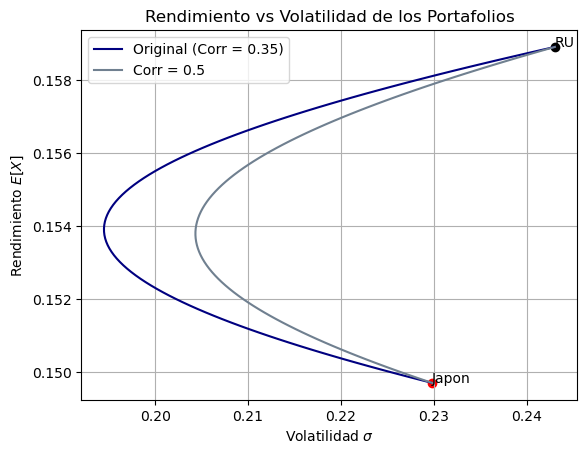

In [25]:
plt.plot(portafolios.vol, portafolios.media, c='navy', label = 'Original (Corr = 0.35)')
plt.plot(portafolios2.vol, portafolios2.media, c='slategray', label = 'Corr = 0.5')

plt.scatter(annual_ret_summ['Japon']['Volatilidad'], annual_ret_summ['Japon']['Media'], c='red')
plt.text(annual_ret_summ['Japon']['Volatilidad'], annual_ret_summ['Japon']['Media'], 'Japon')

plt.scatter(annual_ret_summ['RU']['Volatilidad'], annual_ret_summ['RU']['Media'], c='black')
plt.text(annual_ret_summ['RU']['Volatilidad'], annual_ret_summ['RU']['Media'], 'RU')

plt.title('Rendimiento vs Volatilidad de los Portafolios')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.legend()
plt.grid()

## Conclusiones

**¿Cuál provee más diversificación?**
El portafolio original tiene una mayor diversificación ya que tiene una frontera más amplia debido a su menor correlación entre activos, lo cual ofrece portafolios con misma volatilidad pero más rendimiento, o mismo rendimiento pero menos volatilidad.

**¿Cómo se diferencian?**
El portafolio original tiene una covarianza menor, por lo que los activos se mueven de una manera muy diferente entre ellos ofreciendo así menor riesgo lo caul hace más amplia la frontera de mínima varianza.

**¿Son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?**
El portafolio de mínima varianza para cada caso tiene pesos difernetes para cada activo.

**¿Cómo puede explicar esta diferencia?**
Al cambiar la correlación de los activos la covarianza cambia por fórmula ($\sigma_{12} = p * \sigma_1 * \sigma_2$), y como la covarianza se utiliza para obtener la volatilidad del portafolio y en este caso es distinta a la del portafolio original, los pesos que minimicen la varianza del portafolio van a cambiar ya que son valores de covarianza distintos. Al ser más grande la correlación también la covarianza y por la fórmula de varianza se esta sumando un número más grande por lo que se vuelve más chica la frontera ya que se recorre hacia la derecha.

## 5. Frontera y portafolio de mínima varianza con los 5 índices de mercado 
Usando los datos del punto 1:

1. Construya la frontera de mínima varianza para los portafolios que se pueden crear con todos los índices de mercado. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame.
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?.

In [26]:
e1 = annual_ret_summ['EU'].loc['Media']
e2 = annual_ret_summ['RU'].loc['Media']
e3 = annual_ret_summ['Francia'].loc['Media']
e4 = annual_ret_summ['Alemania'].loc['Media']
e5 = annual_ret_summ['Japon'].loc['Media']

eind = np.array([e1, e2, e3, e4, e5])

sigma

array([[0.02356225, 0.01866144, 0.01568916, 0.01151538, 0.00939355],
       [0.01866144, 0.059049  , 0.03060847, 0.02112173, 0.01999681],
       [0.01568916, 0.03060847, 0.05400976, 0.02856943, 0.02095099],
       [0.01151538, 0.02112173, 0.02856943, 0.04153444, 0.01715502],
       [0.00939355, 0.01999681, 0.02095099, 0.01715502, 0.05280804]])

In [27]:
# Lo que quiero minimizar
def varianza(w, sigma):
    return w.T.dot(sigma).dot(w)

# Restricciones, quiero un rendimiento iguial a mu_req 
def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req

# Pesos tiene que sumar 1 
def weights_equal_1(w):
    return np.sum(w) - 1


cons = (
    # Rendimiento requerido
    {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, 0.15)},
    # Los pesos tienne que ser 1
    {'type': 'eq', 'fun': weights_equal_1}
)
# Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
min_var = minimize(fun=varianza,
                   x0=np.array([1/5, 1/5, 1/5, 1/5, 1/5]),
                   args=(sigma,),
                   bounds=((0,1), (0,1), (0,1), (0,1), (0,1)),
                   constraints=cons)


In [28]:
# ¿Como quedaría la ponderacion?
min_var['x']

array([0.15534315, 0.31750132, 0.13778338, 0.11584884, 0.27352331])

In [29]:
# DataFrame de portafolios de la frontera
portafolios3 = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'w4', 'w5', 'media', 'vol'])

In [30]:
# Número de portafolios
N = 100
ereq = np.linspace(eind.min(), eind.max(), N)

# Para cada rendimiento entre el mínimo y máximo posible ... ¿cuáles son los pesoso con mínima varianza?
for i in range(len(ereq)):
    # Restricciones
    cons = (
        # Rendimiento requerido
        {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, ereq[i])},
        # Los pesos tienne que ser 1
        {'type': 'eq', 'fun': weights_equal_1}
    )
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = minimize(fun=varianza,
                       x0=np.array([1/5, 1/5, 1/5, 1/5, 1/5]),
                       args=(sigma,),
                       bounds=((0,1), (0,1), (0,1), (0,1), (0,1)),
                       constraints=cons
                      )
    # Pesos, rendimientos y volatilidades de los portafolio
    portafolios3.loc[i, ['w1','w2','w3', 'w4','w5']] = min_var.x
    portafolios3['media'][i] = eind.dot(min_var.x)
    portafolios3['vol'][i] = np.sqrt(varianza(min_var.x, sigma))

In [31]:
portafolios3

,w1,w2,w3,w4,w5,media,vol
0,1.0,0.0,0.0,0.0,0.0,0.1355,0.1535
1,0.970455,0.0,0.0,0.029545,0.0,0.135736,0.151285
2,0.940909,0.0,0.0,0.059091,0.0,0.135973,0.149283
3,0.911364,0.0,0.0,0.088636,0.0,0.136209,0.147503
4,0.881818,0.0,0.0,0.118182,0.0,0.136445,0.145953
...,...,...,...,...,...,...,...
96,0.0,0.919608,0.01387,0.0,0.066522,0.158191,0.231185
97,0.0,0.948489,0.000535,0.0,0.050976,0.158427,0.235001
98,0.0,0.974308,0.0,0.0,0.025692,0.158664,0.238935
99,0.0,1.0,0.0,0.0,0.0,0.1589,0.243


In [32]:
portafolio_varianza_minima3 = portafolios3[portafolios3.vol == portafolios3.vol.min()]
portafolio_varianza_minima3

,w1,w2,w3,w4,w5,media,vol
17,0.629309,0.0,0.0,0.200909,0.169783,0.139518,0.136454


In [33]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': weights_equal_1},)
min_var3 = minimize(varianza, 
                    x0=np.array([1/5, 1/5, 1/5, 1/5, 1/5]),
                    args=(sigma,),
                    bounds=((0,1), (0,1), (0,1), (0,1), (0,1)),
                    constraints=cons)
min_var3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.018617763910885928
       x: [ 6.178e-01  0.000e+00  0.000e+00  2.094e-01  1.728e-01]
     nit: 7
     jac: [ 3.718e-02  3.881e-02  3.859e-02  3.755e-02  3.704e-02]
    nfev: 42
    njev: 7

In [34]:
w_minvar3 = min_var3.x
e_minvar3 = eind.dot(w_minvar3)
s_minvar3 = np.sqrt(varianza(w_minvar3, sigma))

w_minvar3, e_minvar3, s_minvar3

(array([0.61779705, 0.        , 0.        , 0.20939436, 0.17280859]),
 0.13962903689371373,
 0.1364469270848044)

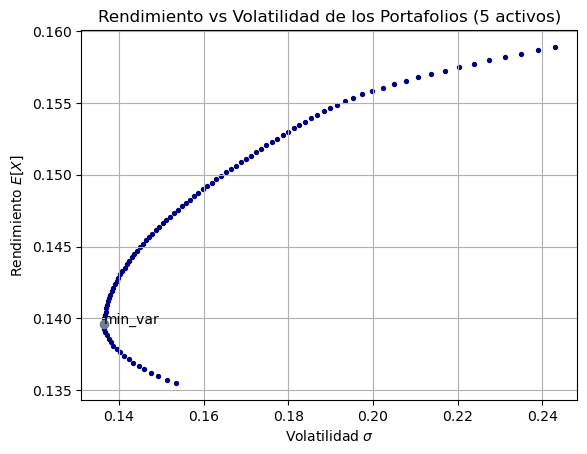

In [35]:
plt.scatter(portafolios3.vol, portafolios3.media, s=8, c='navy')
plt.scatter(s_minvar3, e_minvar3, c='slategray')
plt.text(s_minvar3, e_minvar3, 'min_var')

plt.title('Rendimiento vs Volatilidad de los Portafolios (5 activos)')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

**Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?**

Los pesos del portafolio de mínima varianza son:
* EU: 61.77%
* RU: 0%
* Francia: 0%
* Alemania: 20.94%
* Japón: 17.29%

Rendimiento de portafolio de mínima varianza: 
13.96%

Volatilidad de portafolio de mínima varianza: 
13.64%

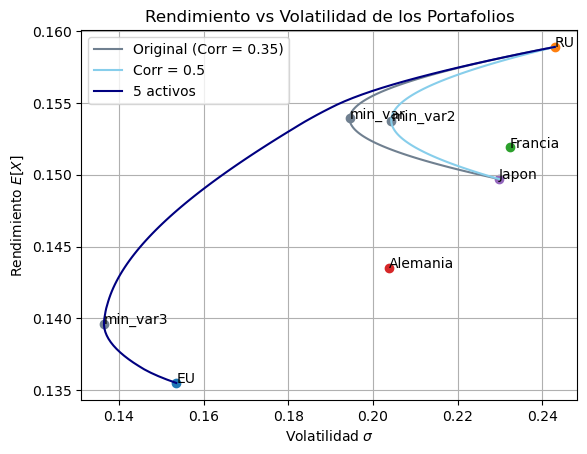

In [36]:
plt.plot(portafolios.vol, portafolios.media, c='slategray', label = 'Original (Corr = 0.35)')
plt.plot(portafolios2.vol, portafolios2.media, c='skyblue', label = 'Corr = 0.5')
plt.plot(portafolios3.vol, portafolios3.media, c='navy', label = '5 activos')

for i in paises:
    plt.scatter(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'])
    plt.text(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'], i)

plt.scatter(s_minvar3, e_minvar3, c='slategray')
plt.text(s_minvar3, e_minvar3, 'min_var3')

plt.scatter(portafolio_varianza_minima2.vol, portafolio_varianza_minima2.media, c='slategray')
plt.text(portafolio_varianza_minima2.vol, portafolio_varianza_minima2.media, 'min_var2')

plt.scatter(portafolio_varianza_minima.vol, portafolio_varianza_minima.media, c='slategray')
plt.text(portafolio_varianza_minima.vol, portafolio_varianza_minima.media, 'min_var')

plt.title('Rendimiento vs Volatilidad de los Portafolios')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.legend()
plt.grid()